In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils.np_utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

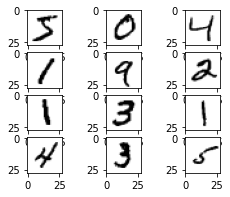

In [4]:
plt.figure(figsize =(4, 3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [5]:
X_train.shape[0]

60000

In [6]:
X_test.shape[0]

10000

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1) #keras bizden 3. boyut istiyor ama verimiz 2 boyutlu
X_test = X_test.reshape(10000, 28, 28, 1) # o yüzden 1 yazarak boyut arttırdık en rahat biçimde

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
X_train = X_train / 255
X_test = X_test / 255 #Tüm değerleri normalize ettik 0 ile 1 arasında

In [10]:
#Keras modelinin kurulması
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
tf.keras.utils.plot_model(model, 'AIUP_mnist.png', show_shapes = True, show_layer_names = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [13]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2, #0 bir şey gözükmez, 1 [==============] bu şekilde ilerleme, 2 --> Epoch 1/5
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2,
)

Epoch 1/5
3000/3000 - 22s - loss: 0.3522 - accuracy: 0.8918 - val_loss: 0.1156 - val_accuracy: 0.9657 - 22s/epoch - 7ms/step
Epoch 2/5
3000/3000 - 18s - loss: 0.1721 - accuracy: 0.9467 - val_loss: 0.0802 - val_accuracy: 0.9772 - 18s/epoch - 6ms/step
Epoch 3/5
3000/3000 - 20s - loss: 0.1379 - accuracy: 0.9574 - val_loss: 0.0811 - val_accuracy: 0.9778 - 20s/epoch - 7ms/step
Epoch 4/5
3000/3000 - 19s - loss: 0.1178 - accuracy: 0.9629 - val_loss: 0.0696 - val_accuracy: 0.9825 - 19s/epoch - 6ms/step
Epoch 5/5
3000/3000 - 20s - loss: 0.1043 - accuracy: 0.9670 - val_loss: 0.0756 - val_accuracy: 0.9803 - 20s/epoch - 7ms/step


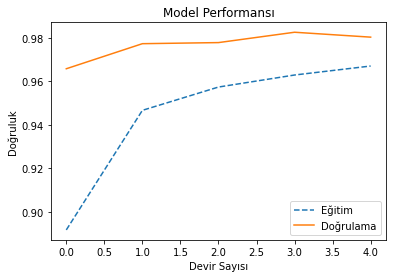

In [14]:
plt.plot(history.history['accuracy'], '--')
plt.plot(history.history['val_accuracy'])
plt.title('Model Performansı')
plt.ylabel('Doğruluk')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim','Doğrulama'], loc = 'lower right')
plt.show()

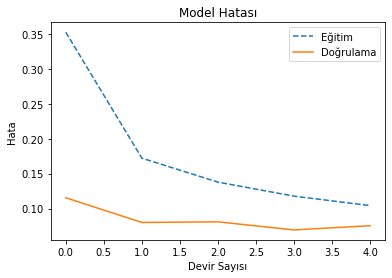

In [15]:
plt.plot(history.history['loss'], '--')
plt.plot(history.history['val_loss'])
plt.title('Model Hatası')
plt.ylabel('Hata')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim','Doğrulama'], loc = 'upper right')
plt.show()

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test verisiyle model doğruluğu : %.2f' % (score[1] * 100))

Test verisiyle model doğruluğu : 97.89


In [17]:
#Tekrarlayan Sinir Ağları
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence

In [18]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)
print(X_train[1])

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [19]:
print(X_train.shape)

(25000,)


In [20]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)

print('Eğitim kümesinin son hali: \n', X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [21]:
print('Eğitim kümesinin boyutları', X_train.shape)

Eğitim kümesinin boyutları (25000, 500)


In [22]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [24]:
tf.keras.utils.plot_model(model, "IMDB_RNN_modeli.png", show_shapes = True, show_layer_names = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [25]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2,
)

Epoch 1/10
40/40 [==============================] - 24s 584ms/step - loss: 0.6892 - accuracy: 0.5352 - val_loss: 0.6792 - val_accuracy: 0.5660
Epoch 2/10
40/40 [==============================] - 25s 628ms/step - loss: 0.6337 - accuracy: 0.6621 - val_loss: 0.5870 - val_accuracy: 0.6874
Epoch 3/10
40/40 [==============================] - 22s 546ms/step - loss: 0.4202 - accuracy: 0.8137 - val_loss: 0.4328 - val_accuracy: 0.8046
Epoch 4/10
40/40 [==============================] - 21s 533ms/step - loss: 0.3015 - accuracy: 0.8775 - val_loss: 0.3785 - val_accuracy: 0.8310
Epoch 5/10
40/40 [==============================] - 21s 537ms/step - loss: 0.2375 - accuracy: 0.9099 - val_loss: 0.3504 - val_accuracy: 0.8494
Epoch 6/10
40/40 [==============================] - 21s 532ms/step - loss: 0.2293 - accuracy: 0.9141 - val_loss: 0.4759 - val_accuracy: 0.7712
Epoch 7/10
40/40 [==============================] - 21s 530ms/step - loss: 0.2096 - accuracy: 0.9218 - val_loss: 0.4191 - val_accuracy: 0.8226

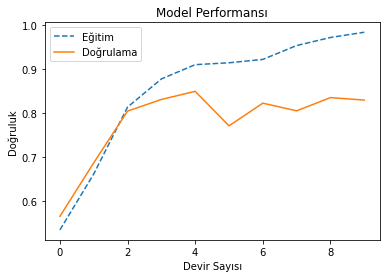

In [26]:
plt.plot(history.history['accuracy'], '--')
plt.plot(history.history['val_accuracy'])
plt.title('Model Performansı')
plt.ylabel('Doğruluk')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim','Doğrulama'], loc = 'upper left')
plt.show()

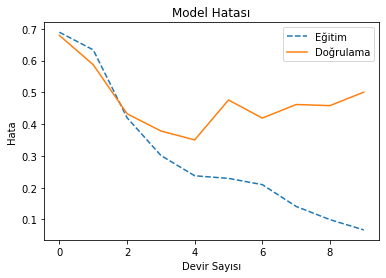

In [27]:
plt.plot(history.history['loss'], '--')
plt.plot(history.history['val_loss'])
plt.title('Model Hatası')
plt.ylabel('Hata')
plt.xlabel('Devir Sayısı')
plt.legend(['Eğitim','Doğrulama'], loc = 'upper right')
plt.show()

In [28]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print('Modelin Doğruluğu: %.2f%%'% (performans[1]*100))

Modelin Doğruluğu: 82.74%


In [36]:
#LSTM 
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, LSTM
from keras.preprocessing import sequence

In [37]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)
print(X_train[1])

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [38]:
print(X_train.shape)

(25000,)


In [39]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)

print('Eğitim kümesinin son hali: \n', X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [40]:
print('Eğitim kümesinin boyutları', X_train.shape)

Eğitim kümesinin boyutları (25000, 500)


In [41]:
#Model mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = "sigmoid"))

In [42]:
tf.keras.utils.plot_model(model, "LSTM-IMDB.png", show_shapes = True, show_layer_names = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [43]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
    )

In [44]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Epoch 1/10
40/40 [==============================] - 128s 3s/step - loss: 0.6640 - accuracy: 0.6016 - val_loss: 0.5418 - val_accuracy: 0.7536
Epoch 2/10
40/40 [==============================] - 148s 4s/step - loss: 0.5069 - accuracy: 0.7886 - val_loss: 0.5322 - val_accuracy: 0.7676
Epoch 3/10
40/40 [==============================] - 145s 4s/step - loss: 0.3748 - accuracy: 0.8472 - val_loss: 0.3470 - val_accuracy: 0.8520
Epoch 4/10
40/40 [==============================] - 144s 4s/step - loss: 0.2812 - accuracy: 0.8870 - val_loss: 0.3103 - val_accuracy: 0.8686
Epoch 5/10
40/40 [==============================] - 142s 4s/step - loss: 0.2268 - accuracy: 0.9134 - val_loss: 0.2998 - val_accuracy: 0.8744
Epoch 6/10
40/40 [==============================] - 142s 4s/step - loss: 0.2041 - accuracy: 0.9258 - val_loss: 0.2953 - val_accuracy: 0.8730
Epoch 7/10
40/40 [==============================] - 149s 4s/step - loss: 0.1777 - accuracy: 0.9351 - val_loss: 0.3158 - val_accuracy: 0.8654
Epoch 8/10
40

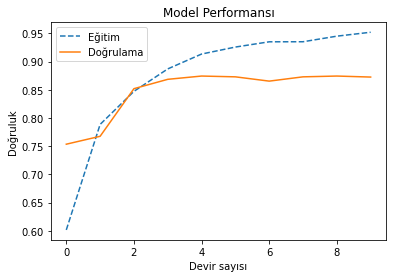

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

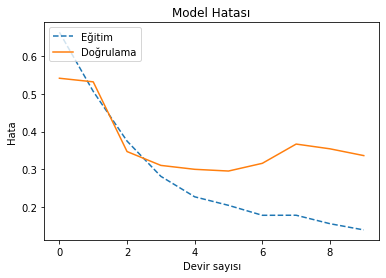

In [47]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

In [48]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı: %.2f%%" % (performans[1]*100))

Modelin test performansı: 86.70%
